In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
def clean_text(text):
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    return ' '.join(text)
df['Review']=df['Review'].apply(lambda x:clean_text(x))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df['Review'].values,df['Liked'].values,random_state=42,test_size=0.2)

In [7]:
x_train[:5],y_train[:5]

(array(['worst salmon sashimi', 'excel new restaur experienc frenchman',
        'went lunch servic slow', 'think restaur suffer tri hard enough',
        'lunch great experi'], dtype=object),
 array([0, 1, 0, 0, 1], dtype=int64))

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import TextVectorization

In [9]:
max_tokens=1500
output_sequence_length=6

In [10]:
text_vectorizer=TextVectorization(max_tokens=max_tokens,output_sequence_length=output_sequence_length)
text_vectorizer.adapt(x_train)

In [11]:
text_vectorizer(x_train[0])

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 75, 247, 328,   0,   0,   0], dtype=int64)>

In [12]:
from keras.layers import Embedding

In [13]:
embedding=Embedding(max_tokens,64,input_length=output_sequence_length)

In [14]:
embedding(text_vectorizer(x_train[0]))

<tf.Tensor: shape=(6, 64), dtype=float32, numpy=
array([[-0.02852415,  0.02832648, -0.03992629, -0.00182552,  0.02473198,
        -0.00395628,  0.03400607,  0.02914763,  0.02763121, -0.00122295,
         0.04755229,  0.04196557, -0.00552953,  0.01041766,  0.00453383,
         0.01247375, -0.01873495,  0.00095875, -0.00205964, -0.04368493,
        -0.01158017,  0.01626024,  0.01699788,  0.02256661,  0.01611433,
        -0.00484008,  0.002132  ,  0.00947632, -0.00508843,  0.03467361,
        -0.02243326,  0.01417097, -0.04706807,  0.04879341,  0.03608744,
        -0.01315435, -0.00421768, -0.02048658, -0.01903402, -0.02996113,
         0.022263  ,  0.00697392,  0.03719611,  0.00944902,  0.01719744,
         0.04082043,  0.0195711 ,  0.04630503, -0.01728417,  0.03828016,
         0.04822036, -0.01424626,  0.00570345,  0.03505388, -0.02133232,
        -0.01195467, -0.02805185,  0.01097576,  0.04206271,  0.01577927,
         0.03989354,  0.01862557,  0.00345075,  0.01593741],
       [ 0.004

In [15]:
from keras.layers import Input

In [25]:
inputs=Input(shape=(1,),batch_size=16,dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=keras.layers.GlobalAveragePooling1D()(x)
x=keras.layers.Dense(100,activation='relu')(x)
#x=keras.layers.Dense(50,activation='relu')(x)
#x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(100,activation='relu')(x)
x=keras.layers.Dense(100,activation='relu')(x)
output=keras.layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs,output,name='Feed-Forward')

In [26]:
model.summary()

Model: "Feed-Forward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(16, 1)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 6)                0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 6, 64)             96000     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dense_3 (Dense)             (None, 100)              

In [27]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.5290 - accuracy: 0.9525 - val_loss: 0.5425 - val_accuracy: 0.7500
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.9853 - val_accuracy: 0.7450
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 1.2343 - val_accuracy: 0.7500
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9975 - val_loss: 1.3004 - val_accuracy: 0.7450
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.4161 - val_accuracy: 0.7500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9975 - val_loss: 1.4210 - val_accuracy: 0.7550
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9975 - val_loss: 1.4626 - val_accuracy: 0.7600
Epoch 8/100
2

25/25 [==============================] - 0s 3ms/step - loss: 1.1599e-04 - accuracy: 1.0000 - val_loss: 2.6342 - val_accuracy: 0.7600
Epoch 55/100
25/25 [==============================] - 0s 3ms/step - loss: 9.9101e-05 - accuracy: 1.0000 - val_loss: 2.6528 - val_accuracy: 0.7600
Epoch 56/100
25/25 [==============================] - 0s 3ms/step - loss: 7.9868e-05 - accuracy: 1.0000 - val_loss: 2.6751 - val_accuracy: 0.7600
Epoch 57/100
25/25 [==============================] - 0s 2ms/step - loss: 9.5293e-05 - accuracy: 1.0000 - val_loss: 2.6919 - val_accuracy: 0.7600
Epoch 58/100
25/25 [==============================] - 0s 2ms/step - loss: 7.9411e-05 - accuracy: 1.0000 - val_loss: 2.7079 - val_accuracy: 0.7600
Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 6.8349e-05 - accuracy: 1.0000 - val_loss: 2.7226 - val_accuracy: 0.7600
Epoch 60/100
25/25 [==============================] - 0s 2ms/step - loss: 8.3685e-05 - accuracy: 1.0000 - val_loss: 2.7405 - val_accuracy

<AxesSubplot:>

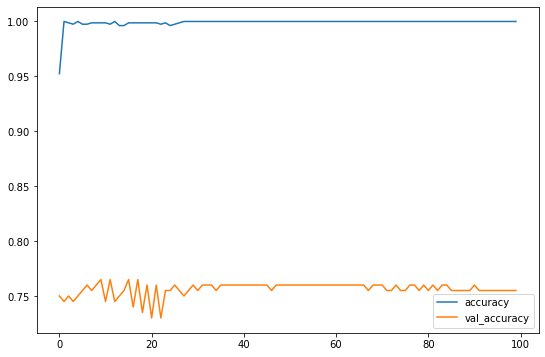

In [28]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(9,6))

In [20]:
predictions=model.predict(x_test)

In [21]:
y_pred=[]
for element in predictions:
    if element>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
from sklearn.metrics import *

In [23]:
accuracy_score(y_test,y_pred)

0.75

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        96
           1       0.78      0.73      0.75       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [35]:
model.predict(['loved it and the ambience was good'])

array([[0.99758244]], dtype=float32)